In [1]:
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
import shapely

### Add a few columns to the inventories:
- one with an entry ID to the outlines
- one with an integer ID (will be needed when creating the glacier rasterized masks)
- one with the glacier area in km2 called `area_km2`

Main inventory (Paul et al. 2020): https://doi.org/10.1594/PANGAEA.909133


In [2]:
fp_raw = Path('../data/data_gmb/outlines_2015/c3s_gi_rgi11_s2_2015_v2/c3s_gi_rgi11_s2_2015_v2.shp')
s2_gdf = gpd.read_file(fp_raw)
s2_gdf['entry_id'] = s2_gdf.GLACIER_NR.apply(lambda x: f"g_{x:04d}")
s2_gdf['entry_id_i'] = s2_gdf.GLACIER_NR.astype(int)
s2_gdf = s2_gdf.rename(columns={'AREA_KM2': 'area_km2', 'Date': 'date_inv'})

# correct the dates for 2017 (no data found for the original date, probably an error)
s2_gdf.loc[s2_gdf.date_inv == '2017-07-10', 'date_inv'] = '2017-10-07'

# export
fp_out = Path(f"../data/outlines/paul_et_al_2020/{fp_raw.name}")
fp_out.parent.mkdir(parents=True, exist_ok=True)
s2_gdf.to_file(fp_out)

s2_gdf

/home/dcodrut/anaconda3/envs/dl4gam/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field date_inv create as date field, though DateTime requested.
  ogr_write(


,GLACIER_NR,LAT,LON,area_km2,ELEV_MIN,ELEV_MAX,ELEV_MEAN,ELEV_MED,SLOPE_MEAN,ASP_MEAN,...,date_inv,Funding,Analyst,O1_REGION,O2_REGION,Country,Footpr_ID,geometry,entry_id,entry_id_i
0,0,44.1138,7.42313,0.058371,2642.04,2864.04,2752.48,2765,26.8816,11.8563,...,2015-08-29,DARA/Levissima,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,29,"POLYGON Z ((373745.749 4886014.748 0, 373753.0...",g_0000,0
1,1,44.1217,7.40278,0.047933,2612.04,2769.04,2660.54,2653,31.6692,36.5235,...,2015-08-29,DARA/Levissima,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,29,"POLYGON Z ((372241.696 4886694.388 0, 372251.5...",g_0001,1
2,2,44.1205,7.41513,0.041097,2451.04,2692.04,2539.32,2508,34.2298,11.2966,...,2015-08-29,DARA/Levissima,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,29,"POLYGON Z ((373140 4886810 0, 373140 4886800 0...",g_0002,2
3,3,44.1255,7.38630,0.030849,2850.04,2979.04,2909.37,2909,40.3645,334.2890,...,2015-08-29,DARA/Levissima,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,29,"POLYGON Z ((370934.913 4887121.787 0, 370941.5...",g_0003,3
4,4,44.1262,7.39148,0.027961,2735.04,2930.04,2829.85,2813,31.7826,9.8094,...,2015-08-29,DARA/Levissima,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,29,"POLYGON Z ((371300 4887430 0, 371300 4887420 0...",g_0004,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390,4390,47.0707,12.70750,0.879276,2768.04,3625.04,3184.07,3186,30.1066,65.3642,...,2016-08-27,ESA_GLACIERS_CCI,G. Schwaizer; J. Nemec; ENVEO,Alps (11),Alps (11-01),AT,5,"POLYGON Z ((781490 5220340 0, 781490 5220330 0...",g_4390,4390
4391,4391,47.1373,12.72750,1.986310,2370.04,3326.04,2986.09,3034,19.3920,342.7750,...,2016-08-27,ESA_GLACIERS_CCI,G. Schwaizer; J. Nemec; ENVEO,Alps (11),Alps (11-01),AT,5,"POLYGON Z ((782288.561 5228290.32 0, 782297.03...",g_4391,4391
4392,4392,47.0316,13.02960,0.499875,2638.04,2969.04,2770.58,2759,21.4683,13.6304,...,2016-08-27,ESA_GLACIERS_CCI,G. Schwaizer; J. Nemec; ENVEO,Alps (11),Alps (11-01),AT,5,"POLYGON Z ((806608.878 5216622.9 0, 806611.99 ...",g_4392,4392
4393,4393,46.7723,10.82570,0.070869,3239.04,3383.04,3315.39,3320,21.5402,166.5850,...,2016-09-29,DARA/Levissima,"D. Fugazza, UNIMI",Alps (11),Alps (11-01),IT,15,"POLYGON Z ((639426.267 5181639.695 0, 639424.8...",g_4393,4393


In [5]:
# export the dates to a csv file (will be used when processing the raw images)
dates_df = s2_gdf[['entry_id', 'date_inv']].rename(columns={'date_inv': 'date'}).copy()
dates_df.to_csv('../data/outlines/paul_et_al_2020/dates.csv', index=False)

Swiss inventory (SGI2016, Linsbauer et al. 2021): https://doi.glamos.ch/data/inventory/inventory_sgi2016_r2020.html 

In [6]:
fp_raw = Path('../data/data_gmb/glamos/inventory_sgi2016_r2020/SGI_2016_glaciers.shp')
sgi_gdf = gpd.read_file(fp_raw)
sgi_gdf['gid'] = sgi_gdf['gid'].astype(int)
sgi_gdf = sgi_gdf.rename(columns={'sgi-id': 'sgi_id'})
sgi_gdf['entry_id'] = sgi_gdf['sgi_id']
sgi_gdf['entry_id_i'] = sgi_gdf['gid']

# export
fp_out = Path(f"../data/outlines/sgi2016/{fp_raw.name}")
fp_out.parent.mkdir(parents=True, exist_ok=True)
sgi_gdf.to_file(fp_out)

sgi_gdf

,gid,pk_glacier,sgi_id,name,rl_0,rl_1,rl_2,rl_3,i_code,year_acq,...,length_km,masl_min,masl_med,masl_mean,masl_max,slope_deg,aspect_deg,geometry,entry_id,entry_id_i
0,16559,bb1e06de-74a9-11ea-bc55-0242ac130003,A10g-04,None,A,1,0,g,04,2014,...,0.234,3033,3101,3101,3168,32.99,268,"POLYGON ((2802224.865 1193097.586, 2802227.799...",A10g-04,16559
1,1503,80f6be00-4ec8-11e8-85b0-985fd331b2ee,A54e-12,Steigletscher,A,5,4,e,12,2016,...,4.234,2032,2932,2877,3494,20.13,342,"MULTIPOLYGON (((2676375.305 1174502.297, 26763...",A54e-12,1503
2,17178,80e3ab30-4ec8-11e8-9357-985fd331b2ee,A54e-19,Vorder Tierberg (Innertkirchen),A,5,4,e,19,2016,...,1.545,2315,2700,2681,3070,25.43,261,"POLYGON ((2673410.261 1172337.403, 2673426.795...",A54e-19,17178
3,16556,8211f200-4ec8-11e8-9016-985fd331b2ee,A10g-09,Chlein Wintertälli,A,1,0,g,09,2014,...,0.551,2634,2753,2749,2847,28.38,343,"POLYGON ((2798559.905 1190687.342, 2798585.701...",A10g-09,16556
4,16777,809e16ae-4ec8-11e8-a93d-985fd331b2ee,A54j-01,Ochsental,A,5,4,j,01,2016,...,0.322,2118,2191,2191,2268,30.15,332,"POLYGON ((2656707.845 1169768.145, 2656717.484...",A54j-01,16777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,13019,81d6bdc0-4ec8-11e8-b1b1-985fd331b2ee,C83-15,Pass da Casnil,C,8,3,None,15,2015,...,0.160,2823,2858,2856,2887,24.76,16,"POLYGON ((2772945.74 1133624.726, 2772947.49 1...",C83-15,13019
1396,16824,80df8c80-4ec8-11e8-b3e5-985fd331b2ee,A54e-15,Taleggligletscher,A,5,4,e,15,2016,...,0.752,2481,2689,2686,2841,27.74,29,"MULTIPOLYGON (((2672856.354 1174156.594, 26728...",A54e-15,16824
1397,16117,80e09df0-4ec8-11e8-8658-985fd331b2ee,A54e-14,Giglistock,A,5,4,e,14,2016,...,0.390,2720,2793,2790,2863,20.13,96,"POLYGON ((2672857.466 1173500.634, 2672854.581...",A54e-14,16117
1398,5446,80e64340-4ec8-11e8-8e3a-985fd331b2ee,A54e-13,Steilimigletscher,A,5,4,e,13,2016,...,1.952,2104,2832,2826,3322,28.67,10,"MULTIPOLYGON (((2673349.861 1172347.237, 26733...",A54e-13,5446


### Combine the 3 debris-coverage products: SGI2016, Herreid and Pellicciotti 2020, Sherler et. al. 2018

Data sources:
- SGI2016: https://doi.glamos.ch/data/inventory/inventory_sgi2016_r2020.html
- Herreid and Pellicciotti 2020: https://zenodo.org/records/3866466
- Sherler et. al. 2018: http://doi.org/10.5880/GFZ.3.3.2018.005
  (Note that for this one, there are three different maps: RATIO, FDC and NDSI. We will combine them into one map.)

The order is at follows:
- for CH, use SGI2016
- for other countries, use Herreid and Pelliciotti first, if it intersects the current glacier, otherwise use Sherler

1. Merge the three debris-coverage maps from Sherler et. al. 2018

In [ ]:
df_1 = gpd.read_file('../data/data_gmb/debris/scherler_2018/11_rgi60_CentralEurope_S2_DC_2015_2017_RATIO.shp')
df_2 = gpd.read_file('../data/data_gmb/debris/scherler_2018/11_rgi60_CentralEurope_S2_DC_2015_2017_FDC.shp')
df_3 = gpd.read_file('../data/data_gmb/debris/scherler_2018/11_rgi60_CentralEurope_S2_DC_2015_2017_NDSI.shp')

In [12]:
final_rgi_set = (
        (set(df_1.RGIId) & set(df_2.RGIId))
        | (set(df_2.RGIId) & set(df_3.RGIId))
        | set(df_1.RGIId) & set(df_3.RGIId)
)
print(len(final_rgi_set))
mode_geometries = {
    'RGIId': [],
    'geometry': []
}

for rgiid in tqdm(final_rgi_set):
    row_1 = df_1[df_1.RGIId == rgiid]
    geom_1 = row_1.iloc[0].geometry.buffer(0) if len(row_1) == 1 else None
    row_2 = df_2[df_2.RGIId == rgiid]
    geom_2 = row_2.iloc[0].geometry.buffer(0) if len(row_2) == 1 else None
    row_3 = df_3[df_3.RGIId == rgiid]
    geom_3 = row_3.iloc[0].geometry.buffer(0) if len(row_3) == 1 else None

    if geom_1 is not None and geom_2 is not None:
        int_12 = geom_1.intersection(geom_2)
        # keep only the polygons
        if int_12.geom_type in ('Point', 'LineString'):
            int_12 = shapely.geometry.MultiPolygon()
        elif int_12.geom_type == 'GeometryCollection':
            int_12 = shapely.MultiPolygon([g for g in int_12.geoms if g.geom_type == 'Polygon'])

    if geom_2 is not None and geom_3 is not None:
        int_23 = geom_2.intersection(geom_3)
        # keep only the polygons
        if int_23.geom_type in ('Point', 'LineString'):
            int_23 = shapely.geometry.MultiPolygon()
        elif int_23.geom_type == 'GeometryCollection':
            int_23 = shapely.MultiPolygon([g for g in int_23.geoms if g.geom_type == 'Polygon'])

    if geom_1 is not None and geom_3 is not None:
        int_13 = geom_1.intersection(geom_3)
        # keep only the polygons
        if int_13.geom_type in ('Point', 'LineString'):
            int_13 = shapely.geometry.MultiPolygon()
        elif int_13.geom_type == 'GeometryCollection':
            int_13 = shapely.MultiPolygon([g for g in int_13.geoms if g.geom_type == 'Polygon'])

    # compute the mode
    final_geom = shapely.ops.unary_union([int_12, int_23, int_13])
    mode_geometries['RGIId'].append(rgiid)
    mode_geometries['geometry'].append(final_geom)

mode_df = gpd.GeoDataFrame(mode_geometries)
mode_df = mode_df.set_crs(epsg=4326)
mode_df['Area'] = mode_df.to_crs({'proj': 'cea'}).area / 1e6
display(mode_df)
mode_df.to_file('../data/data_gmb/debris/scherler_2018/11_rgi60_CentralEurope_S2_DC_2015_2017_mode.shp')

print(f"area 1 = {df_1.DC_Area.sum() / 1e6}")
print(f"area 2 = {df_2.DC_Area.sum() / 1e6}")
print(f"area 3 = {df_3.DC_Area.sum() / 1e6}")
print(f"area mode = {mode_df.Area.sum()}")

3821


  0%|          | 0/3821 [00:00<?, ?it/s]

,RGIId,geometry,Area
0,RGI60-11.00138,"POLYGON ((12.81074 47.10205, 12.81087 47.10205...",0.018902
1,RGI60-11.00405,"POLYGON ((11.91632 47.03094, 11.91628 47.03031...",0.012095
2,RGI60-11.03802,"MULTIPOLYGON (((6.14906 44.90994, 6.1488 44.90...",0.013194
3,RGI60-11.00292,"POLYGON ((12.03617 47.07354, 12.03683 47.07356...",0.009796
4,RGI60-11.00943,"MULTIPOLYGON (((10.82331 46.78188, 10.82344 46...",0.380021
...,...,...,...
3816,RGI60-11.00162,"MULTIPOLYGON (((12.42591 47.10169, 12.42565 47...",0.043694
3817,RGI60-11.01109,"MULTIPOLYGON (((8.43783 46.74778, 8.43796 46.7...",0.057944
3818,RGI60-11.03591,"POLYGON ((6.1566 45.16983, 6.15661 45.16965, 6...",0.040783
3819,RGI60-11.02951,"MULTIPOLYGON (((7.40326 45.90966, 7.40327 45.9...",0.002701


area 1 = 366.6528
area 2 = 578.2768
area 3 = 409.6475
area mode = 393.7242050084444


2. Assemble the three debris-coverage maps from SGI2016, Herreid and Pellicciotti 2020, Sherler et. al. 2018

In [15]:
debris_sgi = gpd.read_file(
    '../data/data_gmb/debris/sgi_2016/SGI_2016_debriscover.shp').to_crs(s2_gdf.crs)
debris_sherler = gpd.read_file(
    '../data/data_gmb/debris/scherler_2018/11_rgi60_CentralEurope_S2_DC_2015_2017_mode.shp').to_crs(
    s2_gdf.crs)
debris_herreid = gpd.read_file(
    '../data/data_gmb/debris/herreid_and_pellicciotti_2020/suppl/S1/11CentralEurope/11CentralEurope_minGl1km2_debrisCover.shp').to_crs(
    s2_gdf.crs)

In [16]:
debris_sgi_o = debris_sgi.rename(columns={'sgi-id': 'entry_id'})[['entry_id', 'year_acq', 'geometry']].overlay(
    s2_gdf[s2_gdf.Country == 'CH'])
debris_sgi_o['area_km2_debris'] = debris_sgi_o.area / 1e6
debris_sgi_o['source_name'] = 'SGI-2016, GLAMOS'
debris_sgi_o

,entry_id_1,year_acq,GLACIER_NR,LAT,LON,area_km2,ELEV_MIN,ELEV_MAX,ELEV_MEAN,ELEV_MED,...,Analyst,O1_REGION,O2_REGION,Country,Footpr_ID,entry_id_2,entry_id_i,geometry,area_km2_debris,source_name
0,B55-19,2016,2935,46.0203,7.86390,1.098330,3036.04,3732.04,3382.14,3386,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,g_2935,2935,"POLYGON Z ((411328.488 5097425.525 0, 411324.1...",0.000054,"SGI-2016, GLAMOS"
1,B55-19,2016,2935,46.0203,7.86390,1.098330,3036.04,3732.04,3382.14,3386,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,g_2935,2935,"MULTIPOLYGON Z (((411293.397 5097480 0, 411290...",0.000010,"SGI-2016, GLAMOS"
2,A55f-01,2016,2995,46.4159,7.54255,0.328933,2608.04,3152.04,2850.77,2774,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,7,g_2995,2995,"MULTIPOLYGON Z (((387976.895 5141440.494 0, 38...",0.002178,"SGI-2016, GLAMOS"
3,B82-44,2016,802,45.9753,7.32291,0.351508,3157.04,3650.04,3422.88,3402,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,23,g_0802,802,"MULTIPOLYGON Z (((370312.707 5092372.189 0, 37...",0.000361,"SGI-2016, GLAMOS"
4,A54e-13,2016,3161,46.6918,8.44074,6.573550,2158.04,3476.04,2907.94,2956,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,g_3161,3161,"MULTIPOLYGON Z (((454366.57 5172747.72 0, 4543...",0.000451,"SGI-2016, GLAMOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,B30-28,2017,1592,46.4493,7.79022,0.542400,2899.04,3192.04,3068.16,3072,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,g_1592,1592,"POLYGON Z ((406967.557 5144965.333 0, 406972.5...",0.000386,"SGI-2016, GLAMOS"
3298,B30-28,2017,1592,46.4493,7.79022,0.542400,2899.04,3192.04,3068.16,3072,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,g_1592,1592,"POLYGON Z ((406994.24 5144923.671 0, 406987.81...",0.000227,"SGI-2016, GLAMOS"
3299,B30-28,2017,1592,46.4493,7.79022,0.542400,2899.04,3192.04,3068.16,3072,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,g_1592,1592,"POLYGON Z ((407294.27 5145064.843 0, 407293.06...",0.000551,"SGI-2016, GLAMOS"
3300,B30-28,2017,1592,46.4493,7.79022,0.542400,2899.04,3192.04,3068.16,3072,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,g_1592,1592,"POLYGON Z ((407264.767 5145129.546 0, 407261.9...",0.000132,"SGI-2016, GLAMOS"


In [17]:
debris_herreid['entry_id'] = debris_herreid['id'].apply(lambda x: f"hp_{x}")
debris_herreid_o = debris_herreid.rename(columns={'img_time': 'year_acq'})[
    ['entry_id', 'year_acq', 'geometry']].overlay(s2_gdf[s2_gdf.Country != 'CH'])
debris_herreid_o['area_km2_debris'] = debris_herreid_o.area / 1e6
debris_herreid_o['source_name'] = 'Herreid and Pellicciotti, 2020'

# drop the objects smaller than one pixel
debris_herreid_o = debris_herreid_o[debris_herreid_o.area_km2_debris >= 1e-4]
debris_herreid_o

,entry_id_1,year_acq,GLACIER_NR,LAT,LON,area_km2,ELEV_MIN,ELEV_MAX,ELEV_MEAN,ELEV_MED,...,Analyst,O1_REGION,O2_REGION,Country,Footpr_ID,entry_id_2,entry_id_i,geometry,area_km2_debris,source_name
0,hp_80,2011.64,4064,46.7805,11.01980,2.178060,2563.04,3396.04,2951.65,2933,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,g_4064,4064,"POLYGON Z ((654045.001 5183205.001 0, 654015.0...",0.012533,"Herreid and Pellicciotti, 2020"
2,hp_82,2011.64,4064,46.7805,11.01980,2.178060,2563.04,3396.04,2951.65,2933,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,g_4064,4064,"MULTIPOLYGON Z (((654675.001 5182734.445 0, 65...",0.027273,"Herreid and Pellicciotti, 2020"
3,hp_83,2011.64,4092,46.7812,10.94670,6.045350,2708.04,3463.04,3134.83,3157,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,g_4092,4092,"POLYGON Z ((649425.001 5183715.001 0, 649395.0...",0.000310,"Herreid and Pellicciotti, 2020"
4,hp_84,2011.64,4092,46.7812,10.94670,6.045350,2708.04,3463.04,3134.83,3157,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,g_4092,4092,"MULTIPOLYGON Z (((649443.808 5183720 0, 649458...",0.000465,"Herreid and Pellicciotti, 2020"
5,hp_85,2011.64,4360,46.7743,10.99420,7.872960,2523.04,3360.04,3006.31,3021,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,g_4360,4360,"MULTIPOLYGON Z (((653477.84 5183465.169 0, 653...",0.000677,"Herreid and Pellicciotti, 2020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,hp_1620,2015.66,3008,46.4090,8.30498,1.155660,2606.04,3163.04,2870.50,2849,...,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,10,g_3008,3008,"MULTIPOLYGON Z (((446773.578 5139460.5 0, 4467...",0.013707,"Herreid and Pellicciotti, 2020"
989,hp_1963,2011.64,4047,46.8105,11.05650,0.884982,2518.04,3150.04,2872.89,2910,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,g_4047,4047,"MULTIPOLYGON Z (((656292.799 5187046.487 0, 65...",0.000252,"Herreid and Pellicciotti, 2020"
990,hp_1964,2011.64,4047,46.8105,11.05650,0.884982,2518.04,3150.04,2872.89,2910,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,g_4047,4047,"MULTIPOLYGON Z (((656292.799 5187046.487 0, 65...",0.000252,"Herreid and Pellicciotti, 2020"
991,hp_1965,2013.68,4047,46.8105,11.05650,0.884982,2518.04,3150.04,2872.89,2910,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,g_4047,4047,"MULTIPOLYGON Z (((656292.799 5187046.487 0, 65...",0.000108,"Herreid and Pellicciotti, 2020"


In [18]:
# Sherler et. al. do not provide the exact dates of the image. They used Landsat observations over 2013-2017 and Sentinel-2 over 2015-2017. So we will assume 2016 as an average.
debris_sherler['year_acq'] = 2016
debris_sherler_o = debris_sherler.rename(columns={'RGIId': 'entry_id'})[['entry_id', 'year_acq', 'geometry']].overlay(
    s2_gdf[s2_gdf.Country != 'CH'], keep_geom_type=False)
debris_sherler_o['area_km2_debris'] = debris_sherler_o.area / 1e6
debris_sherler_o['source_name'] = 'Sherler et. al., 2018'

# drop the objects smaller than one pixel
debris_sherler_o = debris_sherler_o[debris_sherler_o.area_km2_debris >= 1e-4]
debris_sherler_o

,entry_id_1,year_acq,GLACIER_NR,LAT,LON,area_km2,ELEV_MIN,ELEV_MAX,ELEV_MEAN,ELEV_MED,...,Analyst,O1_REGION,O2_REGION,Country,Footpr_ID,entry_id_2,entry_id_i,geometry,area_km2_debris,source_name
0,RGI60-11.00138,2016,3827,47.1000,12.81120,0.180979,2492.04,2845.04,2659.68,2667,...,G. Schwaizer; J. Nemec; ENVEO,Alps (11),Alps (11-01),AT,5,g_3827,3827,"MULTIPOLYGON Z (((789326.954 5223677.879 0, 78...",0.000468,"Sherler et. al., 2018"
2,RGI60-11.03802,2016,134,44.9100,6.14839,0.013719,2966.04,3145.04,3038.85,3041,...,Antoine Rabatel; IGE,Alps (11),Alps (11-01),FR,27,g_0134,134,"MULTIPOLYGON Z (((274950 4976910 0, 274950 497...",0.000954,"Sherler et. al., 2018"
3,RGI60-11.00292,2016,3330,47.0726,12.03730,0.028804,2752.04,2914.04,2838.23,2831,...,G. Schwaizer; J. Nemec; ENVEO,Alps (11),Alps (11-01),AT,5,g_3330,3330,"POLYGON Z ((730566.735 5217755.538 0, 730556.7...",0.001108,"Sherler et. al., 2018"
4,RGI60-11.00943,2016,4361,46.7895,10.83860,5.180750,2713.04,3482.04,3064.03,3072,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,g_4361,4361,GEOMETRYCOLLECTION Z (LINESTRING Z (639610 518...,0.015418,"Sherler et. al., 2018"
5,RGI60-11.00945,2016,4092,46.7812,10.94670,6.045350,2708.04,3463.04,3134.83,3157,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,g_4092,4092,"MULTIPOLYGON Z (((645980 5182700 0, 645980 518...",0.158881,"Sherler et. al., 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,RGI60-11.03313,2016,655,45.9039,6.92708,0.137019,2493.04,2770.04,2579.45,2567,...,Antoine Rabatel; IGE,Alps (11),Alps (11-01),FR,22,g_0655,655,"MULTIPOLYGON Z (((339045.068 5085280 0, 339045...",0.002834,"Sherler et. al., 2018"
2220,RGI60-11.03071,2016,534,45.5875,6.98174,0.185688,2804.04,3178.04,2992.14,2996,...,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,24,g_0534,534,"MULTIPOLYGON Z (((342440 5049920 0, 342440 504...",0.011138,"Sherler et. al., 2018"
2221,RGI60-11.00162,2016,3574,47.1033,12.43000,0.314526,2559.04,2802.04,2649.43,2634,...,G. Schwaizer; J. Nemec; ENVEO,Alps (11),Alps (11-01),AT,5,g_3574,3574,"MULTIPOLYGON Z (((759935.18 5222240.403 0, 759...",0.009345,"Sherler et. al., 2018"
2222,RGI60-11.02951,2016,677,45.9087,7.40351,0.027556,3070.04,3185.04,3125.37,3120,...,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,24,g_0677,677,"POLYGON Z ((376160 5085210 0, 376160 5085210 0...",0.000333,"Sherler et. al., 2018"


In [19]:
debris_final = pd.concat(
    [debris_sgi_o, debris_herreid_o, debris_sherler_o[~debris_sherler_o.GLACIER_NR.isin(debris_herreid_o.GLACIER_NR)]])
debris_final = debris_final.rename(columns={'entry_id_1': 'entry_id_debris', 'entry_id_2': 'entry_id'})
debris_final

,entry_id_debris,year_acq,GLACIER_NR,LAT,LON,area_km2,ELEV_MIN,ELEV_MAX,ELEV_MEAN,ELEV_MED,...,Analyst,O1_REGION,O2_REGION,Country,Footpr_ID,entry_id,entry_id_i,geometry,area_km2_debris,source_name
0,B55-19,2016.0,2935,46.0203,7.86390,1.098330,3036.04,3732.04,3382.14,3386,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,g_2935,2935,"POLYGON Z ((411328.488 5097425.525 0, 411324.1...",0.000054,"SGI-2016, GLAMOS"
1,B55-19,2016.0,2935,46.0203,7.86390,1.098330,3036.04,3732.04,3382.14,3386,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,g_2935,2935,"MULTIPOLYGON Z (((411293.397 5097480 0, 411290...",0.000010,"SGI-2016, GLAMOS"
2,A55f-01,2016.0,2995,46.4159,7.54255,0.328933,2608.04,3152.04,2850.77,2774,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,7,g_2995,2995,"MULTIPOLYGON Z (((387976.895 5141440.494 0, 38...",0.002178,"SGI-2016, GLAMOS"
3,B82-44,2016.0,802,45.9753,7.32291,0.351508,3157.04,3650.04,3422.88,3402,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,23,g_0802,802,"MULTIPOLYGON Z (((370312.707 5092372.189 0, 37...",0.000361,"SGI-2016, GLAMOS"
4,A54e-13,2016.0,3161,46.6918,8.44074,6.573550,2158.04,3476.04,2907.94,2956,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,g_3161,3161,"MULTIPOLYGON Z (((454366.57 5172747.72 0, 4543...",0.000451,"SGI-2016, GLAMOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,RGI60-11.03313,2016.0,655,45.9039,6.92708,0.137019,2493.04,2770.04,2579.45,2567,...,Antoine Rabatel; IGE,Alps (11),Alps (11-01),FR,22,g_0655,655,"MULTIPOLYGON Z (((339045.068 5085280 0, 339045...",0.002834,"Sherler et. al., 2018"
2220,RGI60-11.03071,2016.0,534,45.5875,6.98174,0.185688,2804.04,3178.04,2992.14,2996,...,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,24,g_0534,534,"MULTIPOLYGON Z (((342440 5049920 0, 342440 504...",0.011138,"Sherler et. al., 2018"
2221,RGI60-11.00162,2016.0,3574,47.1033,12.43000,0.314526,2559.04,2802.04,2649.43,2634,...,G. Schwaizer; J. Nemec; ENVEO,Alps (11),Alps (11-01),AT,5,g_3574,3574,"MULTIPOLYGON Z (((759935.18 5222240.403 0, 759...",0.009345,"Sherler et. al., 2018"
2222,RGI60-11.02951,2016.0,677,45.9087,7.40351,0.027556,3070.04,3185.04,3125.37,3120,...,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,24,g_0677,677,"POLYGON Z ((376160 5085210 0, 376160 5085210 0...",0.000333,"Sherler et. al., 2018"


Debris coverage percentages for all:
#glaciers = 2663
total glacier area = 1676.15 km2
total debris area = 135.81 km2 (=> 8.10%)



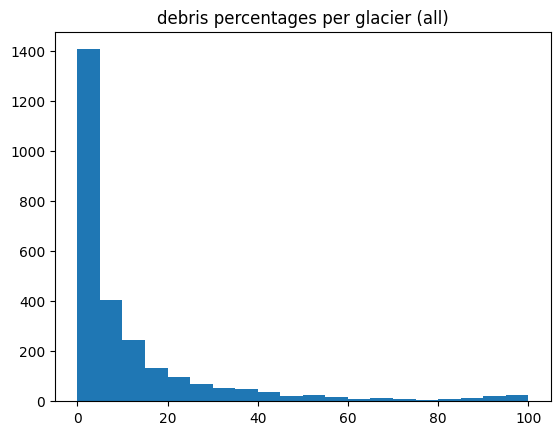

Debris coverage percentages for CH:
#glaciers = 917
total glacier area = 804.13 km2
total debris area = 62.26 km2 (=> 7.74%)

Debris coverage percentages for CH > 0.1 km2:
#glaciers = 473
total glacier area = 787.36 km2
total debris area = 58.94 km2 (=> 7.49%)

Debris coverage percentages for CH > 0.1 km2 and > 1%:
#glaciers = 306
total glacier area = 607.43 km2
total debris area = 58.39 km2 (=> 9.61%)



In [20]:
# check the debris coverage percentages for:
#  1) all glaciers
#  2) CH glaciers
#  3) CH glaciers larger than 0.1 km2
#  4) CH glaciers larger than 0.1 km2 and with debris coverage more than 1% (this will be used in the paper)

debris_prc = debris_final.groupby('entry_id').area_km2_debris.sum() / debris_final.groupby('entry_id').area_km2.first()
gdf_list = {
    'all': debris_final,
    'CH': debris_final[debris_final.Country == 'CH'],
    'CH > 0.1 km2': debris_final[(debris_final.Country == 'CH') & (debris_final.area_km2 >= 0.1)],
    'CH > 0.1 km2 and > 1%': debris_final[
        (debris_final.Country == 'CH') &
        (debris_final.area_km2 >= 0.1) &
        debris_final.entry_id.isin(list(debris_prc[debris_prc >= 0.01].index))
        ]
}

for name, _gdf in gdf_list.items():
    areas_gl = _gdf.groupby('entry_id').area_km2.first()
    areas_debris = _gdf.groupby('entry_id').area_km2_debris.sum()
    debris_prc = areas_debris / areas_gl * 100

    print(f"Debris coverage percentages for {name}:")
    print(f"#glaciers = {_gdf.entry_id.nunique()}")
    print(f"total glacier area = {areas_gl.sum():.2f} km2")
    print(f"total debris area = {areas_debris.sum():.2f} km2 (=> {areas_debris.sum() / areas_gl.sum() * 100:.2f}%)")
    print()

    if name == 'all':
        plt.figure(dpi=100)
        plt.hist(debris_prc, bins=20)
        plt.title(f'debris percentages per glacier ({name})')
        plt.show()

In [ ]:
fp_out = Path('../data/outlines/debris_multisource/debris_multisource.shp')
fp_out.parent.mkdir(parents=True, exist_ok=True)
debris_final['geometry'] = debris_final.buffer(0)  # fix invalid geometries

# rename columns (max 10 characters)
debris_final = debris_final.rename(columns={
    'entry_id_debris': 'entry_id_d',
    'area_km2_debris': 'debris_km2',
    'source_name': 'source'
})
debris_final.to_file(fp_out)